In [2]:
! pip install tensorflow

ERROR: Could not install packages due to an OSError: [WinError 2] The system cannot find the file specified: 'c:\\python39\\Scripts\\f2py.exe' -> 'c:\\python39\\Scripts\\f2py.exe.deleteme'

You should consider upgrading via the 'c:\python39\python.exe -m pip install --upgrade pip' command.

  Using cached tensorflow-2.5.0-cp39-cp39-win_amd64.whl (422.6 MB)
  Using cached keras_nightly-2.5.0.dev2021032900-py2.py3-none-any.whl (1.2 MB)
  Using cached astunparse-1.6.3-py2.py3-none-any.whl (12 kB)
  Using cached tensorflow_estimator-2.5.0-py2.py3-none-any.whl (462 kB)
  Using cached grpcio-1.34.1-cp39-cp39-win_amd64.whl (2.9 MB)
  Using cached Keras_Preprocessing-1.1.2-py2.py3-none-any.whl (42 kB)
  Using cached wrapt-1.12.1-py3-none-any.whl
  Using cached numpy-1.19.5-cp39-cp39-win_amd64.whl (13.3 MB)
  Using cached google_pasta-0.2.0-py3-none-any.whl (57 kB)
  Using cached termcolor-1.1.0-py3-none-any.whl
  Using cached typing_extensions-3.7.4.3-py3-none-any.whl (22 kB)
  Using cached te

In [1]:
import tensorflow as tf
from tensorflow.keras.models import load_model

In [2]:
lo_model = load_model('static/model.h5')

In [3]:
lo_model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 128, 128, 32)      416       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 128, 128, 32)      4128      
_________________________________________________________________
batch_normalization (BatchNo (None, 128, 128, 32)      128       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 64, 64, 32)        0         
_________________________________________________________________
dropout (Dropout)            (None, 64, 64, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 64, 64, 64)        8256      
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 64, 64, 64)        1

In [4]:
lo_model.get_weights()

[array([[[[ 0.01777084, -0.12536612, -0.19740173,  0.17752983,
           -0.11685241,  0.18354163, -0.10014594,  0.14078504,
           -0.13737029, -0.13509189, -0.08346617,  0.1925682 ,
            0.09220596, -0.13827328, -0.0595117 ,  0.10709947,
            0.1263452 ,  0.07136381,  0.16553628,  0.05059183,
           -0.12134274,  0.07107121, -0.20631936, -0.19126756,
            0.00845636, -0.1500849 , -0.04900473,  0.13375255,
            0.03745583,  0.02599609,  0.1826726 ,  0.18164259],
          [ 0.03145419,  0.10485951, -0.0134534 ,  0.18445957,
            0.20834094, -0.13402703, -0.09012461,  0.08767959,
            0.12235824, -0.20439556, -0.02141191,  0.11729532,
           -0.0132709 ,  0.05752981,  0.11980709, -0.01611445,
            0.03695321, -0.08971173, -0.08265179,  0.06852491,
           -0.1043049 ,  0.0542757 ,  0.0800617 , -0.19732508,
            0.14878345, -0.17298263,  0.18377516, -0.09851326,
            0.00287636,  0.03199058, -0.12110917, -0.1

In [5]:
def names(number):
    if number == 0:
        return "Patient has tumor"
    else:
        return "COngratulations !!! Patient do not have tumor"

COngratulations !!! Patient do not have tumor
Prediction value =  100.0


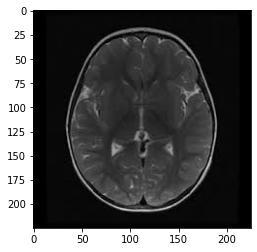

In [6]:
from PIL import Image
import numpy as np

from matplotlib.pyplot import imshow
img = Image.open(r"datadata/patmri.jpg")
x = np.array(img.resize((128,128)))
x = x.reshape((1,128,128,3))
res = lo_model.predict_on_batch(x)
classification = np.where(res == np.amax(res))[1][0]
imshow(img)
print( names(classification))
print('Prediction value =  ' + str(res[0][classification]*100))

COngratulations !!! Patient do not have tumor
Prediction value =  100.0


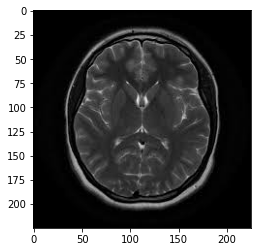

In [8]:
from PIL import Image
import numpy as np

from matplotlib.pyplot import imshow
img = Image.open(r"datadata/tymri.jpg")
x = np.array(img.resize((128,128)))
x = x.reshape((1,128,128,3))
res = lo_model.predict_on_batch(x)
classification = np.where(res == np.amax(res))[1][0]
imshow(img)
print(  names(classification))
print('Prediction value =  ' + str(res[0][classification]*100))

Patient has tumor
Prediction value =  99.99935626983643


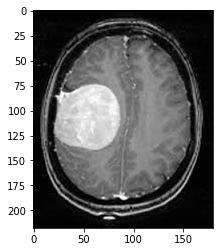

In [7]:
from PIL import Image
import numpy as np

from matplotlib.pyplot import imshow
img = Image.open(r"datadata/screenshot.jpg")
x = np.array(img.resize((128,128)))
x = x.reshape((1,128,128,3))
res = lo_model.predict_on_batch(x)
classification = np.where(res == np.amax(res))[1][0]
imshow(img)
print(  names(classification))
print('Prediction value =  ' + str(res[0][classification]*100))